In [ ]:
# Install Kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting up the environment variable for the kaggle.jason file and the new Kaggle directory
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Brain json"

In [ ]:
# Downloading the dataset from kaggle
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 76% 66.0M/86.8M [00:00<00:00, 221MB/s]
100% 86.8M/86.8M [00:00<00:00, 217MB/s]


In [ ]:
# Unzipping the dataset
!unzip /content/brain-tumor-classification-mri.zip -d /content/brain-tumor-classification

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/brain-tumor-classification/Testing/glioma_tumor/image(18).jpg  


In [ ]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/brain-tumor-classification/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/brain-tumor-classification/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 587s 7s/step - loss: 2.5178 - accuracy: 0.3292 - val_loss: 1.2519 - val_accuracy: 0.4456
Epoch 2/20
83/83 [==============================] - 584s 7s/step - loss: 1.0805 - accuracy: 0.5236 - val_loss: 1.0808 - val_accuracy: 0.5748
Epoch 3/20
83/83 [==============================] - 577s 7s/step - loss: 0.9366 - accuracy: 0.6016 - val_loss: 0.9798 - val_accuracy: 0.5884
Epoch 4/20
83/83 [==============================] - 563s 7s/step - loss: 0.8493 - accuracy: 0.6462 - val_loss: 0.9537 - val_accuracy: 0.6259
Epoch 5/20
83/83 [==============================] - 555s 7s/step - loss: 0.7995 - accuracy: 0.6534 - val_loss: 0.8517 - val_accuracy: 0.6122
Epoch 6/20
83/83 [==============================] - 553s 7s/step - loss: 0.6903 - accuracy: 0.7189 - val_loss: 0.8604 - val_accuracy: 0.6429
Epoch 7/20
83/83 [==============================] - 555s 7s/step - loss: 0.6220 - accuracy: 0.7397 - val_loss: 0.7087 - val_accuracy: 0.7075
Epoch 8/20
83

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

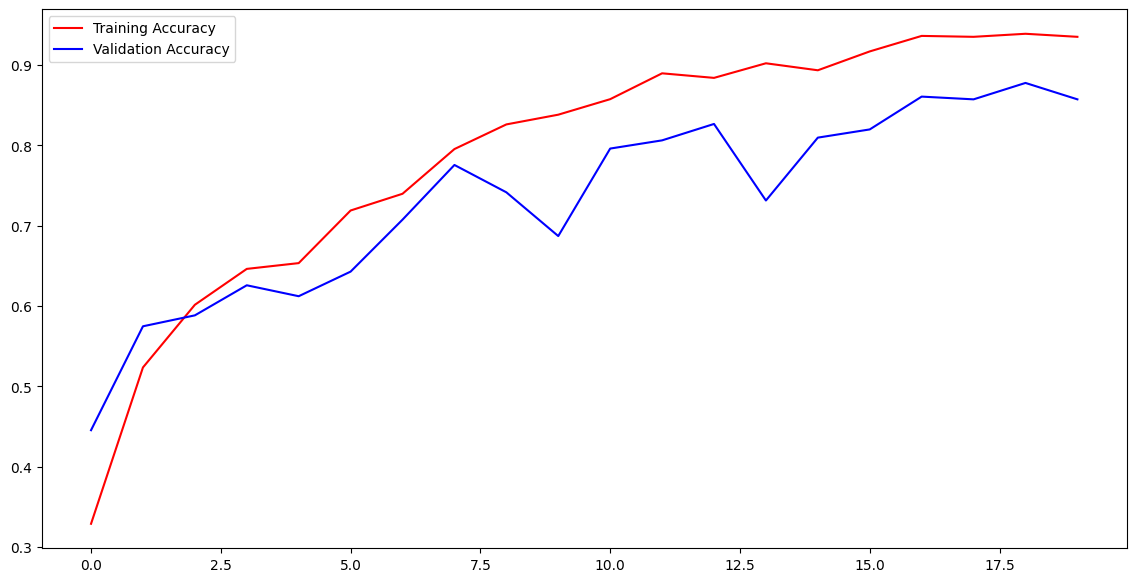

In [ ]:
# saving the model
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

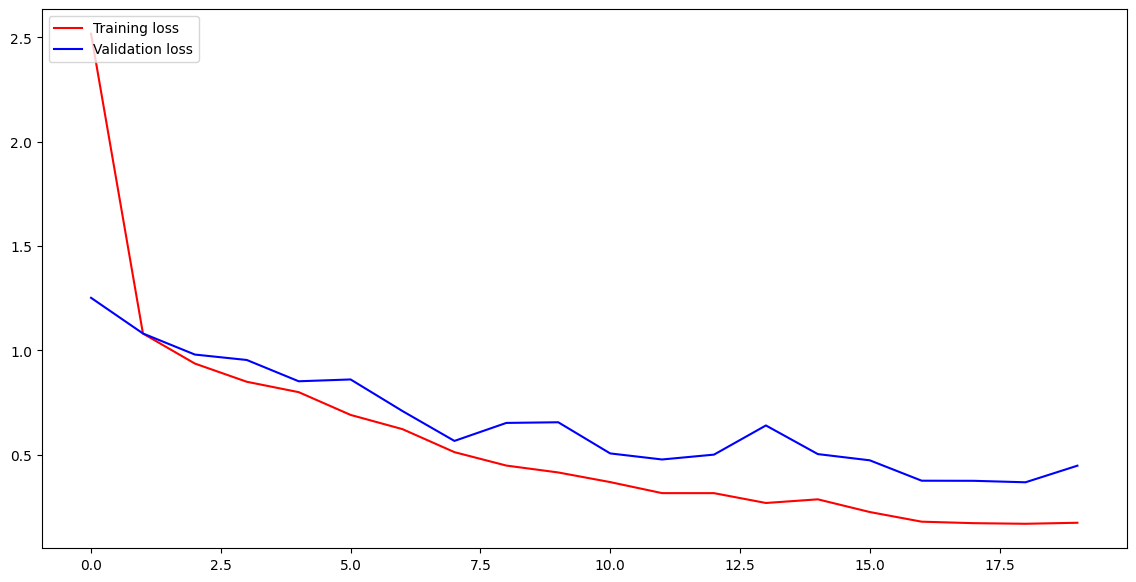

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Code cell for confusion mattrix

11/11 [==============================] - 17s 2s/step


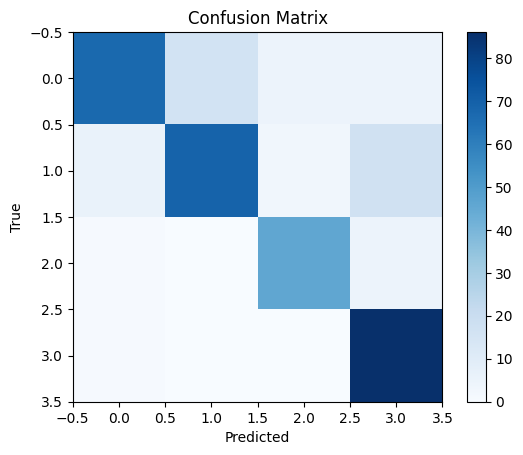

In [ ]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Load the model
model = load_model('braintumor.h5')

# Generate the predictions
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure()
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
img = cv2.imread('/content/brain-tumor-classification/Training/meningioma_tumor/m1(144).jpg')
if img is not None:
    img = cv2.resize(img, (150, 150))
    img_array = np.array(img)
    img_array.shape
else:
    print("Failed to read the image.")

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

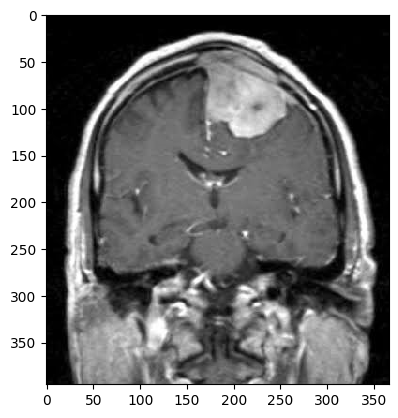

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain-tumor-classification/Training/meningioma_tumor/m1(144).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
print(indices)
if(indices==0):
  print("Glioma tumor")
elif(indices==1):
  print("Meningioma tumor")
elif(indices==2):
  print("No tumor")
elif(indices==3):
  print("Pituitary tumor")

1/1 [==============================] - 0s 217ms/step
1
Meningioma tumor
